In [1]:
import matplotlib.pyplot as plt, numpy as np
from  matplotlib import animation as am
import random as rnd

# inline plot
%matplotlib inline
# inline animation (html5 video)
from IPython.display import HTML

class EinsteinSolid:                        # Einstein solid object
    def __init__(self, N=400, q=10):
        self.N = N
        self.cell = [q]*N                   # q units energy per cell

    def __add__(self, other):               # combine two solids
        self.N += other.N
        self.cell += other.cell
        return self

    def exchange(self, L=20):               # iterate L times
        for i in range(L):
            take = rnd.randint(0, self.N-1) # random pair
            give = rnd.randint(0, self.N-1)
            while self.cell[take] == 0:     # find a nonzero-energy cell
                take = rnd.randint(0, self.N-1)
            self.cell[take] -= 1            # exchange energy
            self.cell[give] += 1

    def sample(self):                       # sample energy distribution
        N, Nt, q = self.N, 0, 0
        pn = []
        while Nt < N:
            n = self.cell.count(q)          # num of oscillators with energy q
            pn.append(n)                    # counts
            Nt += n
            q += 1                          # increase energy
        error = np.sqrt(pn)                 # statistical error
        return q, np.array(pn)/float(N), error/N

def updateimg(*args):                   # args[0] = frame
    L = 20 if args[0]<100 else 200      # slower initial rate
    solid.exchange(L)
    plot.set_data(np.reshape(solid.cell, (K,K)))  # update image
    return [plot]                       # return line object in a list

In [2]:
# set up solid
K = 20                                  # grid dimension
qavg = 10                               # avg  units of energy per oscillator
solid = EinsteinSolid(N = K*K, q=qavg)
# analytic Boltzmann dist, qavg = 1/(exp(1/kT)-1), 1/kT=ln(1+1/qavg)
kT = 1/np.log(1+1./qavg)
Emax = 4*qavg
En=np.arange(Emax)

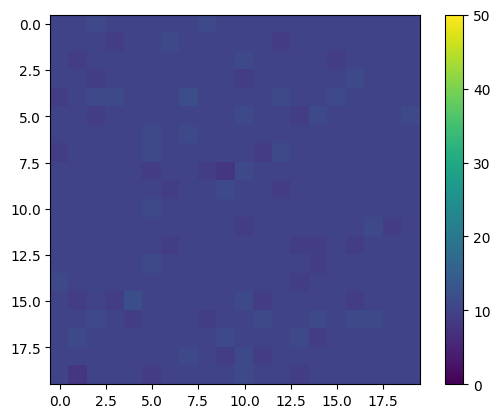

In [3]:
fig = plt.figure()
img = np.reshape(solid.cell, (K,K))     # shape to KxK image
plot = plt.imshow(img, interpolation='none', vmin=0, vmax=50)
plt.colorbar(plot)
anim = am.FuncAnimation(fig, updateimg, frames=400, repeat=True, interval=20, blit=True)  # animate

In [4]:
HTML(anim.to_html5_video()) # animate, be patient

[]

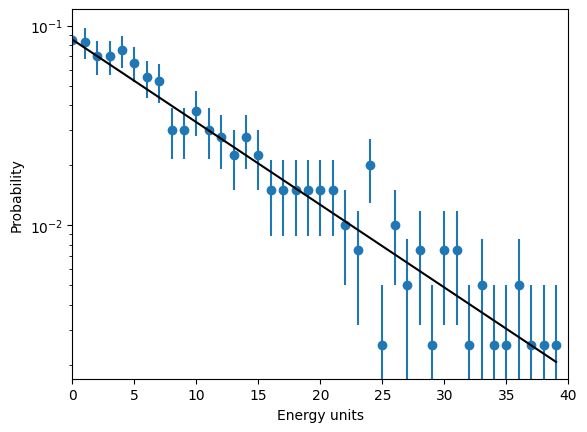

In [5]:
# plotting results
fig = plt.figure()
solid.exchange(100*solid.N)         # thermalize, 100 interactions per oscillator
qmax, pn, error = solid.sample()
plt.plot(range(qmax), pn, 'o')
plt .errorbar(range(qmax) , pn, error, fmt='none')
pmax = max(pn)
plt.plot(En, np.exp(-En/kT)*pmax, '-k')    # normalized theoretical result
plt.xlim(0,Emax)
plt.xlabel('Energy units')
plt.ylabel('Probability')
plt.semilogy()        # semilog scale